In [70]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:00<00:00, 11.9MB/s]


In [3]:
# Visit the scraping site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
#Parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')

In [49]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
temp_table = pd.read_html(url)

df = pd.DataFrame(temp_table[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [17]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
#How many months are on Mars?
df["month"].nunique()

12

In [21]:
#How many Martian days worth of data exist?
df["sol"].nunique()

1867

[-77.16091954022988,
 -79.93258426966293,
 -83.30729166666667,
 -82.74742268041237,
 -79.30872483221476,
 -75.29931972789116,
 -72.28169014084507,
 -68.38297872340425,
 -69.17164179104478,
 -71.98214285714286,
 -71.98550724637681,
 -74.45180722891567]

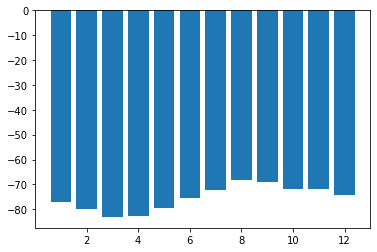

In [75]:
#What are the coldest and warmest months on Mars?

#Set x_axis
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12]

#Set y_axis
y_axis = []
size = len(df)

#Outer loop runs through the entire inner loop before moving on to the next value
for x in range(1,13):
    temp_array = []
    mean_var = 0
    counter = 0
    for y in range(len(df)):
        if(df.loc[y].month == x):
            temp_array.append(df.loc[y].min_temp)
            mean_var += df.loc[y].min_temp
            counter += 1
    y_axis.append(mean_var/counter)
    
    
plt.bar(x_axis, y_axis)
y_axis
#Warmest month: August
#Coldest month: March

[862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024]

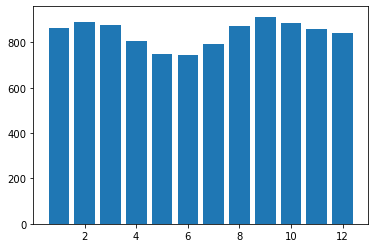

In [76]:
#Which months have the highest and lowest atmospheric pressure on Mars?

#Set x_axis
x_axis = [1,2,3,4,5,6,7,8,9,10,11,12]

#Set y_axis
y_axis = []
size = len(df)

#Outer loop runs through the entire inner loop before moving on to the next value
for x in range(1,13):
    temp_array = []
    mean_var = 0
    counter = 0
    for y in range(len(df)):
        if(df.loc[y].month == x):
            temp_array.append(df.loc[y].pressure)
            mean_var += df.loc[y].pressure
            counter += 1
    y_axis.append(mean_var/counter)
    
    
plt.bar(x_axis, y_axis)
y_axis
#Highest pressure: Sepetember
#Lowest pressure: June

<BarContainer object of 1867 artists>

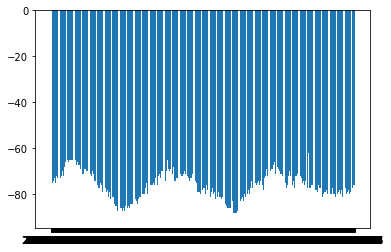

In [78]:
#About how many terrestrial days exist in a Martian year?

x_axis = []
for x in range(len(df)):
    x_axis.append(df.loc[x].terrestrial_date)

y_axis = []
for x in range(len(df)):
    y_axis.append(df.loc[x].min_temp)
    
plt.bar(x_axis, y_axis)

#Approximately 620 Martian days exist in a Earth year
#Data has 1867 Mars days. Graph shows about 3 years worth of data

In [79]:
csv_data = df.to_csv('Mars_data.csv', index=False)